# DATASET INFORMATIOM:
The dataset ‘Test_DataCore.csv’ contains line-level data of patient encounters at H + H facilities for 
a number of years. Each row in the dataset corresponds to a visit at an H + H facility with visit dates 
and times and the patient’s demographic information. 
The dataset ‘Test_DataCore_VitalStats.csv’ contains patient level information from vital statistics. 
This data corresponds to deaths in NYC in the time period of interest. 
Please note that none of these datasets contain any PHI. All the patient and visit information in this 
dataset is fictional, created solely for the purposes of this test and does not correspond to real 
patients.

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set()

Q1: Import the Dataset ‘Test_DataCore.csv’ into your preferred statistical analysis program and 
include the code you used to import the dataset in your submitted code. (No .doc answer necessary 
for this question, only the code) 

In [432]:
Test_DataCore=pd.read_csv("Test_DataCore.csv")

In [433]:
Test_DataCore.head(5)

,PATIENT_ID,VISIT_ID,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,CLINIC_CODE,BIRTHDATE,SEX,RACE,DATE_OF_DEATH,VISIT_ACTIVATION_DATE_TIME,DISCHARGE_TYPE,FACILITY,VISIT_STATUS
0,819392,393056076,18MAY02:17:04:00,24MAY02:09:32:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,18MAY02:17:04:00,discharge (routine),H + H Facility,closed discharged
1,819392,1058555571,20MAY13:12:29:00,20MAY13:18:49:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,20MAY13:12:29:00,discharge (routine),H + H Facility,discharged
2,819392,1059883796,28MAY13:15:20:00,03JUN13:19:32:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,28MAY13:13:20:00,routine,H + H Facility,discharged
3,819392,1063747314,18JUN13:13:51:00,18JUN13:15:18:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,18JUN13:13:51:00,routine,H + H Facility,discharged
4,819392,1081404139,01OCT13:09:04:00,01OCT13:15:13:00,NaN,31AUG64:00:03:05,Female,White,10-Jul-15,30SEP13:01:10:00,discharge (routine),H + H Facility,discharged


In [434]:
Test_DataCore.isnull().sum()

PATIENT_ID                       0
VISIT_ID                         0
ADMISSION_DATE_TIME              0
DISCHARGE_DATE_TIME            208
CLINIC_CODE                    433
BIRTHDATE                        0
SEX                              0
RACE                             0
DATE_OF_DEATH                 9668
VISIT_ACTIVATION_DATE_TIME       0
DISCHARGE_TYPE                 255
FACILITY                         0
VISIT_STATUS                     0
dtype: int64

In [435]:
Test_DataCore["FACILITY"].unique()

array(['H + H Facility'], dtype=object)

In [436]:
Test_DataCore["DATE_OF_DEATH"].unique()

array(['10-Jul-15', nan, '2-Jul-15', '25-Feb-15', '17-Sep-15'],
      dtype=object)

There are some missing values in discharge_date_time,clinic_code ,date_of_death and visit_activation_date_time

Q2: How many patients are in the dataset?

In [437]:
Test_DataCore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PATIENT_ID                  10000 non-null  int64  
 1   VISIT_ID                    10000 non-null  int64  
 2   ADMISSION_DATE_TIME         10000 non-null  object 
 3   DISCHARGE_DATE_TIME         9792 non-null   object 
 4   CLINIC_CODE                 9567 non-null   float64
 5   BIRTHDATE                   10000 non-null  object 
 6   SEX                         10000 non-null  object 
 7   RACE                        10000 non-null  object 
 8   DATE_OF_DEATH               332 non-null    object 
 9   VISIT_ACTIVATION_DATE_TIME  10000 non-null  object 
 10  DISCHARGE_TYPE              9745 non-null   object 
 11  FACILITY                    10000 non-null  object 
 12  VISIT_STATUS                10000 non-null  object 
dtypes: float64(1), int64(2), object(

##### There are 10000 patients are in the dataset

Q3: How many of the patients died? 

##### as we know the above dataset is having total number date_of_death entering is 332 so the number of patients are died is 332 without handling missing data from dataset

Q4: Vital statistics recently released the data on deaths in 2015. For H+H patients, these are 
available in the file ‘Test_DataCore_VitalStats.csv’. Merge the missing dates of death received from 
vital statistics ‘vitalstats’ for the patients into the previous dataset. How many patients died in total?

In [438]:
Test_DataCore_VitalStats= pd.read_csv("Test_DataCore_VitalStats.csv")

In [439]:
Test_DataCore_VitalStats.info()## total number of paient id available is 98

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PATIENT_ID     98 non-null     int64 
 1   DATE_OF_DEATH  98 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [440]:
Test_DataCore_VitalStats.isnull().sum()

PATIENT_ID       0
DATE_OF_DEATH    0
dtype: int64

In [441]:
## mering two dataset. by using patient_id
df=pd.merge(Test_DataCore,Test_DataCore_VitalStats,on= 'PATIENT_ID' ,how='left')
df.head()

,PATIENT_ID,VISIT_ID,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,CLINIC_CODE,BIRTHDATE,SEX,RACE,DATE_OF_DEATH_x,VISIT_ACTIVATION_DATE_TIME,DISCHARGE_TYPE,FACILITY,VISIT_STATUS,DATE_OF_DEATH_y
0,819392,393056076,18MAY02:17:04:00,24MAY02:09:32:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,18MAY02:17:04:00,discharge (routine),H + H Facility,closed discharged,10JUL2015
1,819392,1058555571,20MAY13:12:29:00,20MAY13:18:49:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,20MAY13:12:29:00,discharge (routine),H + H Facility,discharged,10JUL2015
2,819392,1059883796,28MAY13:15:20:00,03JUN13:19:32:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,28MAY13:13:20:00,routine,H + H Facility,discharged,10JUL2015
3,819392,1063747314,18JUN13:13:51:00,18JUN13:15:18:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,18JUN13:13:51:00,routine,H + H Facility,discharged,10JUL2015
4,819392,1081404139,01OCT13:09:04:00,01OCT13:15:13:00,NaN,31AUG64:00:03:05,Female,White,10-Jul-15,30SEP13:01:10:00,discharge (routine),H + H Facility,discharged,10JUL2015


In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PATIENT_ID                  10000 non-null  int64  
 1   VISIT_ID                    10000 non-null  int64  
 2   ADMISSION_DATE_TIME         10000 non-null  object 
 3   DISCHARGE_DATE_TIME         9792 non-null   object 
 4   CLINIC_CODE                 9567 non-null   float64
 5   BIRTHDATE                   10000 non-null  object 
 6   SEX                         10000 non-null  object 
 7   RACE                        10000 non-null  object 
 8   DATE_OF_DEATH_x             332 non-null    object 
 9   VISIT_ACTIVATION_DATE_TIME  10000 non-null  object 
 10  DISCHARGE_TYPE              9745 non-null   object 
 11  FACILITY                    10000 non-null  object 
 12  VISIT_STATUS                10000 non-null  object 
 13  DATE_OF_DEATH_y             916 

In [443]:
df.isnull().sum()

PATIENT_ID                       0
VISIT_ID                         0
ADMISSION_DATE_TIME              0
DISCHARGE_DATE_TIME            208
CLINIC_CODE                    433
BIRTHDATE                        0
SEX                              0
RACE                             0
DATE_OF_DEATH_x               9668
VISIT_ACTIVATION_DATE_TIME       0
DISCHARGE_TYPE                 255
FACILITY                         0
VISIT_STATUS                     0
DATE_OF_DEATH_y               9084
dtype: int64

#### The total number of patient died is 1,248 addition of DATE_OF_DEATH_x and DATE_OF_DEATH_y

Q5: When was the last visit date for the patients who have died? Create a table which lists number 
of days from last visit date to date of death. Paste the output table in your answer.

In [458]:
# Assuming df is your DataFrame containing patient information
# Convert date columns to datetime if they are not already
df['DATE_OF_DEATH_x'] = pd.to_datetime(df['DATE_OF_DEATH_x'])
df['DATE_OF_DEATH_y'] = pd.to_datetime(df['DATE_OF_DEATH_y'])
df['VISIT_ACTIVATION_DATE_TIME'] = pd.to_datetime(df['VISIT_ACTIVATION_DATE_TIME'], format='%d%b%y:%H:%M:%S')

# Filter patients who have died
#dead_patients = df[df[["DATE_OF_DEATH_x","DATE_OF_DEATH_y"]].notnull()]
dead_patients = df[(df['DATE_OF_DEATH_x'].notnull()) | (df['DATE_OF_DEATH_y'].notnull())]


# Calculate number of days from last visit date to date of death
days_to_death_x = (dead_patients["DATE_OF_DEATH_x"] - last_visit_dates).dt.days
days_to_death_y = (dead_patients["DATE_OF_DEATH_y"] - last_visit_dates).dt.days   

# Find the last visit date for each patient
last_visit_dates = dead_patients.groupby('PATIENT_ID')['VISIT_ACTIVATION_DATE_TIME'].max()

# Calculate number of days from last visit date to date of death
days_to_death = (dead_patients["DATE_OF_DEATH_x"] - last_visit_dates).dt.days
days_to_death = (dead_patients["DATE_OF_DEATH_y"] - last_visit_dates).dt.days

# Create a table
print({'PATIENT_ID': last_visit_dates.index, 'Days_to_Death': days_to_death})

#print(output_table)

{'PATIENT_ID': Int64Index([  819392, 15150240, 28438144, 28653184, 30041536, 30172352,
            44109184, 53420640, 63383264],
           dtype='int64', name='PATIENT_ID'), 'Days_to_Death': 0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
            ..
30041536   NaN
30172352   NaN
44109184   NaN
53420640   NaN
63383264   NaN
Length: 925, dtype: float64}


In [457]:
days_to_death.info()

<class 'pandas.core.series.Series'>
Int64Index: 10000 entries, 0 to 9999
Series name: None
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 156.2 KB


In [59]:
df[["PATIENT_ID","VISIT_ACTIVATION_DATE_TIME","DATE_OF_DEATH_x","DATE_OF_DEATH_y"]]

,PATIENT_ID,VISIT_ACTIVATION_DATE_TIME,DATE_OF_DEATH_x,DATE_OF_DEATH_y
0,819392,18MAY02:17:04:00,10-Jul-15,10JUL2015
1,819392,20MAY13:12:29:00,10-Jul-15,10JUL2015
2,819392,28MAY13:13:20:00,10-Jul-15,10JUL2015
3,819392,18JUN13:13:51:00,10-Jul-15,10JUL2015
4,819392,30SEP13:01:10:00,10-Jul-15,10JUL2015
...,...,...,...,...
9995,66704736,01FEB08:01:45:00,NaN,NaN
9996,66704736,12DEC07:00:01:00,NaN,NaN
9997,66704736,03MAR08:10:16:00,NaN,NaN
9998,66704736,03MAR08:14:13:00,NaN,NaN


In [72]:
# Convert the 'VISIT_ACTIVATION_DATE_TIME' column to datetime format
# Specify the format for the first datetime string
df["VISIT_ACTIVATION_DATE_TIME"]= pd.to_datetime(df['VISIT_ACTIVATION_DATE_TIME'], format='%d%b%y:%H:%M:%S')

In [73]:
df.head()

,PATIENT_ID,VISIT_ID,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,CLINIC_CODE,BIRTHDATE,SEX,RACE,DATE_OF_DEATH_x,VISIT_ACTIVATION_DATE_TIME,DISCHARGE_TYPE,FACILITY,VISIT_STATUS,DATE_OF_DEATH_y
0,819392,393056076,18MAY02:17:04:00,24MAY02:09:32:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,2002-05-18 17:04:00,discharge (routine),H + H Facility,closed discharged,10JUL2015
1,819392,1058555571,20MAY13:12:29:00,20MAY13:18:49:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,2013-05-20 12:29:00,discharge (routine),H + H Facility,discharged,10JUL2015
2,819392,1059883796,28MAY13:15:20:00,03JUN13:19:32:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,2013-05-28 13:20:00,routine,H + H Facility,discharged,10JUL2015
3,819392,1063747314,18JUN13:13:51:00,18JUN13:15:18:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,2013-06-18 13:51:00,routine,H + H Facility,discharged,10JUL2015
4,819392,1081404139,01OCT13:09:04:00,01OCT13:15:13:00,NaN,31AUG64:00:03:05,Female,White,10-Jul-15,2013-09-30 01:10:00,discharge (routine),H + H Facility,discharged,10JUL2015


In [77]:
df[df['DATE_OF_DEATH_x'].notnull()].info()  ## total number of death 332

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 3513
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PATIENT_ID                  332 non-null    int64         
 1   VISIT_ID                    332 non-null    int64         
 2   ADMISSION_DATE_TIME         332 non-null    object        
 3   DISCHARGE_DATE_TIME         325 non-null    object        
 4   CLINIC_CODE                 328 non-null    float64       
 5   BIRTHDATE                   332 non-null    object        
 6   SEX                         332 non-null    object        
 7   RACE                        332 non-null    object        
 8   DATE_OF_DEATH_x             332 non-null    object        
 9   VISIT_ACTIVATION_DATE_TIME  332 non-null    datetime64[ns]
 10  DISCHARGE_TYPE              325 non-null    object        
 11  FACILITY                    332 non-null    object       

In [78]:
df[df["DATE_OF_DEATH_y"].notnull()].info() ## total death 916

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 9607
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PATIENT_ID                  916 non-null    int64         
 1   VISIT_ID                    916 non-null    int64         
 2   ADMISSION_DATE_TIME         916 non-null    object        
 3   DISCHARGE_DATE_TIME         905 non-null    object        
 4   CLINIC_CODE                 888 non-null    float64       
 5   BIRTHDATE                   916 non-null    object        
 6   SEX                         916 non-null    object        
 7   RACE                        916 non-null    object        
 8   DATE_OF_DEATH_x             332 non-null    object        
 9   VISIT_ACTIVATION_DATE_TIME  916 non-null    datetime64[ns]
 10  DISCHARGE_TYPE              904 non-null    object        
 11  FACILITY                    916 non-null    object       

In [81]:
df= df[df[["DATE_OF_DEATH_x","DATE_OF_DEATH_y"]].notnull()] .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PATIENT_ID                  0 non-null      float64       
 1   VISIT_ID                    0 non-null      float64       
 2   ADMISSION_DATE_TIME         0 non-null      object        
 3   DISCHARGE_DATE_TIME         0 non-null      object        
 4   CLINIC_CODE                 0 non-null      float64       
 5   BIRTHDATE                   0 non-null      object        
 6   SEX                         0 non-null      object        
 7   RACE                        0 non-null      object        
 8   DATE_OF_DEATH_x             332 non-null    object        
 9   VISIT_ACTIVATION_DATE_TIME  0 non-null      datetime64[ns]
 10  DISCHARGE_TYPE              0 non-null      object        
 11  FACILITY                    0 non-null      object     

In [82]:
(df['VISIT_ACTIVATION_DATE_TIME'] - df[['DATE_OF_DEATH_x',"DATE_OF_DEATH_y"]]).dt.days

TypeError: 'NoneType' object is not subscriptable

In [ ]:
## calculate the number of days from last visit date to date of death
dead_patients['days_from_last_visit_to_death'] = (dead_patients['date_of_death'] - dead_patients['last_visit_date']).dt.days


Q6: Create a table with the race distribution of patients in the dataset. Paste the output table in 
your answer.

In [207]:
race_distribution=df['RACE'].value_counts()
race_distribution

Black or African American            6181
Hispanic                             3295
Other                                 261
White                                 165
American Indian or Alaskan Native      85
Unknown                                13
Name: RACE, dtype: int64

In [208]:
# Create a DataFrame from the race distribution series
race_distribution_table = pd.DataFrame(race_distribution).reset_index()
race_distribution_table.columns = ['Race', 'Count']

In [209]:
# Display the output table
print(race_distribution_table)  ### past the is pending

                                Race  Count
0          Black or African American   6181
1                           Hispanic   3295
2                              Other    261
3                              White    165
4  American Indian or Alaskan Native     85
5                            Unknown     13


Q7: Create visualization age and age by gender distribution of patients in the dataset. Paste the 
visualizations in your answer. Also, briefly describe the distributions. 

In [210]:
df.head(4)

,PATIENT_ID,VISIT_ID,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,CLINIC_CODE,BIRTHDATE,SEX,RACE,DATE_OF_DEATH_x,VISIT_ACTIVATION_DATE_TIME,DISCHARGE_TYPE,FACILITY,VISIT_STATUS,DATE_OF_DEATH_y
0,819392,393056076,18MAY02:17:04:00,24MAY02:09:32:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,18MAY02:17:04:00,discharge (routine),H + H Facility,closed discharged,10JUL2015
1,819392,1058555571,20MAY13:12:29:00,20MAY13:18:49:00,0.0,31AUG64:00:03:05,Female,White,10-Jul-15,20MAY13:12:29:00,discharge (routine),H + H Facility,discharged,10JUL2015
2,819392,1059883796,28MAY13:15:20:00,03JUN13:19:32:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,28MAY13:13:20:00,routine,H + H Facility,discharged,10JUL2015
3,819392,1063747314,18JUN13:13:51:00,18JUN13:15:18:00,840.0,31AUG64:00:03:05,Female,White,10-Jul-15,18JUN13:13:51:00,routine,H + H Facility,discharged,10JUL2015


In [211]:
##### we don't have age col so i am going to calculate the age by using bithdate
# Convert 'birthdate' column to datetime
from datetime import datetime
df['BIRTHDATE'] = pd.to_datetime(df['BIRTHDATE'], format='%d%b%y:%H:%M:%S')

# Calculate current date
current_date = datetime.now()

# Calculate age
df['AGE'] = (df['BIRTHDATE']-current_date).dt.days // 365
df['AGE'] = df['AGE'].apply(lambda x: max(0, x))

# Display DataFrame with age
print(df)

      PATIENT_ID    VISIT_ID ADMISSION_DATE_TIME DISCHARGE_DATE_TIME  \
0         819392   393056076    18MAY02:17:04:00    24MAY02:09:32:00   
1         819392  1058555571    20MAY13:12:29:00    20MAY13:18:49:00   
2         819392  1059883796    28MAY13:15:20:00    03JUN13:19:32:00   
3         819392  1063747314    18JUN13:13:51:00    18JUN13:15:18:00   
4         819392  1081404139    01OCT13:09:04:00    01OCT13:15:13:00   
...          ...         ...                 ...                 ...   
9995    66704736   704384188    01FEB08:01:45:00    01FEB08:23:59:00   
9996    66704736   706564714    12DEC07:00:01:00    12FEB08:16:06:00   
9997    66704736   709893621    03MAR08:10:16:00    03MAR08:16:18:00   
9998    66704736   710017851    03MAR08:14:13:00    06MAR08:13:12:00   
9999    66704736   710833254    06MAR08:17:02:00    06MAR08:17:28:00   

      CLINIC_CODE           BIRTHDATE     SEX                       RACE  \
0             0.0 2064-08-31 00:03:05  Female              

In [212]:
df["AGE"].unique()

array([40,  0, 39, 29,  9, 38, 33, 27, 22, 26, 16, 24, 15, 43, 28, 34, 36,
       37, 12, 20, 42, 32, 31, 35, 23], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


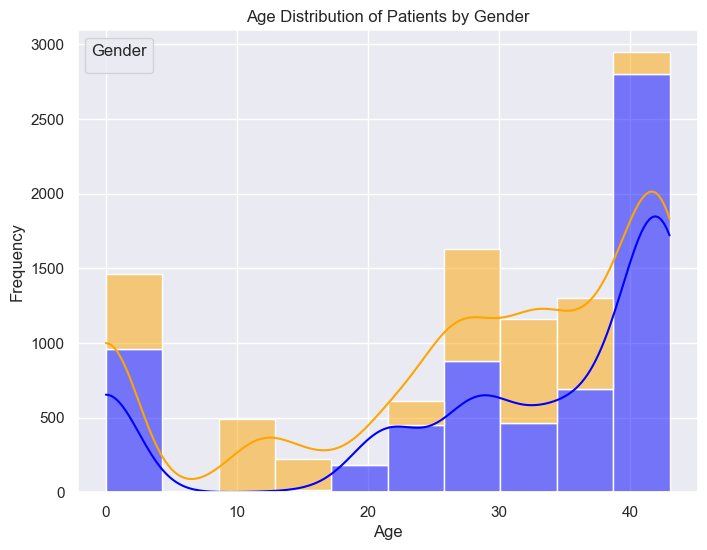

In [213]:
# Set figure size
plt.figure(figsize=(8, 6))

# Define custom colors for male and female
colors = {'Male': 'blue', 'Female': 'orange'}

# Create histogram with seaborn, specifying colors
sns.histplot(data=df, x='AGE', hue='SEX', bins=10, kde=True, multiple='stack', palette=colors)

# Set title and axis labels
plt.title('Age Distribution of Patients by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add legend with title
plt.legend(title='Gender')

# Display grid
plt.grid(True)

In [214]:
## AS the AGE OF FEMALE INCREASE THE DENSITY IS ALSO INCRAEASING BUT DENSITY OF FEMALE IS MORE AS AS COMPARING TO MALE

Q8: Calculate total days spent at the hospital for each patient, visualize (with a software/tool of 
your choice), and describe the distribution. Paste the visualizations in your answer.

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PATIENT_ID                  10000 non-null  int64         
 1   VISIT_ID                    10000 non-null  int64         
 2   ADMISSION_DATE_TIME         10000 non-null  object        
 3   DISCHARGE_DATE_TIME         9792 non-null   object        
 4   CLINIC_CODE                 9567 non-null   float64       
 5   BIRTHDATE                   10000 non-null  datetime64[ns]
 6   SEX                         10000 non-null  object        
 7   RACE                        10000 non-null  object        
 8   DATE_OF_DEATH_x             332 non-null    object        
 9   VISIT_ACTIVATION_DATE_TIME  10000 non-null  object        
 10  DISCHARGE_TYPE              9745 non-null   object        
 11  FACILITY                    10000 non-null  object     

In [217]:
# Convert admission and discharge dates to datetime
df['ADMISSION_DATE_TIME'] = pd.to_datetime(df['ADMISSION_DATE_TIME'],format='%d%b%y:%H:%M:%S')
df['DISCHARGE_DATE_TIME'] = pd.to_datetime(df['DISCHARGE_DATE_TIME'],format='%d%b%y:%H:%M:%S')

# Calculate the length of stay for each patient
df['LENGTH_OF_STAY'] = (df['DISCHARGE_DATE_TIME'] - df['ADMISSION_DATE_TIME']).dt.days

# Calculate total days spent at the hospital for each patient
TOTAL_DAYS_SPEND = df.groupby('PATIENT_ID')['LENGTH_OF_STAY'].sum().reset_index()

print(TOTAL_DAYS_SPEND)

    PATIENT_ID  LENGTH_OF_STAY
0       819392            41.0
1      2205504           470.0
2      3136000             4.0
3      3435936           533.0
4      3847424           135.0
..         ...             ...
75    64050112             6.0
76    64927520           128.0
77    65186240            21.0
78    66174752             1.0
79    66704736          1594.0

[80 rows x 2 columns]


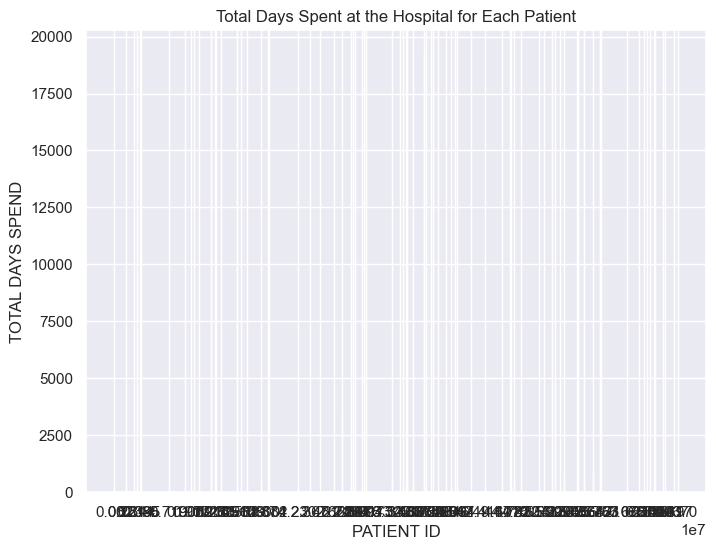

In [218]:
# Plotting the distribution of total days spent at the hospital
plt.figure(figsize=(8, 6))
plt.bar(TOTAL_DAYS_SPEND['PATIENT_ID'], TOTAL_DAYS_SPEND['LENGTH_OF_STAY'], color='skyblue')
plt.title('Total Days Spent at the Hospital for Each Patient')
plt.xlabel('PATIENT ID')
plt.ylabel('TOTAL DAYS SPEND')
plt.xticks(TOTAL_DAYS_SPEND['PATIENT_ID'])
plt.grid(True)
plt.show()

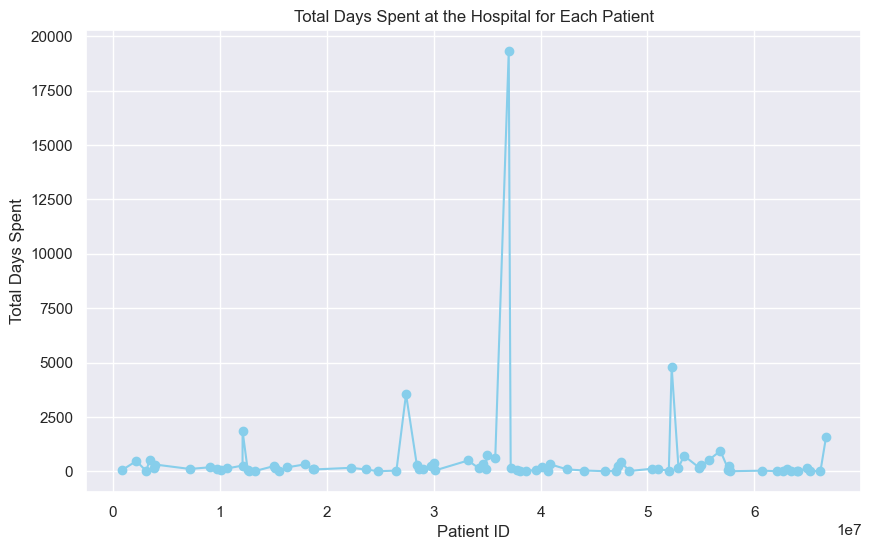

In [219]:
plt.figure(figsize=(10, 6))
plt.plot(TOTAL_DAYS_SPEND['PATIENT_ID'], TOTAL_DAYS_SPEND['LENGTH_OF_STAY'], color='skyblue', marker='o', linestyle='-')
plt.title('Total Days Spent at the Hospital for Each Patient')
plt.xlabel('Patient ID')
plt.ylabel('Total Days Spent')
plt.grid(True)
plt.show()

Q9: A) Investigate inpatient visits (patients who stayed for more than a day at the hospital) for each 
patient. Output a list of the top 10 patient_ids who spent maximum days in the hospital in the past 
year (2015). Paste the output table in your answer.

In [220]:
# THIS IS ORGINAL
# Filter inpatient visits
inpatient_data = df[df['LENGTH_OF_STAY'] > 1]
# Calculate length of stay for each patient
inpatient_data['LENGTH_OF_STAY'] = (inpatient_data['DISCHARGE_DATE_TIME'] - inpatient_data['ADMISSION_DATE_TIME']).dt.days
# Filter visits in the past year (2015)
inpatient_data_2015 = inpatient_data[inpatient_data['ADMISSION_DATE_TIME'].dt.year == 2015]
# Group by patient ID and sum total days spent
total_days_spent = inpatient_data_2015.groupby('PATIENT_ID')['LENGTH_OF_STAY'].sum().reset_index()
# Sort patients based on total days spent and select top 10
top_10_patients = total_days_spent.nlargest(10, 'LENGTH_OF_STAY')
print(top_10_patients)

    PATIENT_ID  LENGTH_OF_STAY
36    37026752             293
39    40160736             156
3      3435936             129
4      3950912             107
52    53420640              98
54    55047104              91
53    54848192              90
15    15150240              89
32    34603968              46
49    50986208              45


C:\Users\HP\AppData\Local\Temp\ipykernel_15556\2775384724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inpatient_data['LENGTH_OF_STAY'] = (inpatient_data['DISCHARGE_DATE_TIME'] - inpatient_data['ADMISSION_DATE_TIME']).dt.days


In [221]:
df= df[df['LENGTH_OF_STAY'] > 1]

# Filter visits in the past year (2015)
#df[df['ADMISSION_DATE_TIME'].dt.year == 2015]

# Group by patient ID and sum total days spent
TOTAL_DAYS_SPEND_GP = df[df['ADMISSION_DATE_TIME'].dt.year == 2015].groupby('PATIENT_ID')['LENGTH_OF_STAY'].sum().reset_index()

# Sort patients based on total days spent and select top 10
TOP_10_PATIENTS = TOTAL_DAYS_SPEND_GP.nlargest(10, 'LENGTH_OF_STAY')
print(TOP_10_PATIENTS)

    PATIENT_ID  LENGTH_OF_STAY
36    37026752           293.0
39    40160736           156.0
3      3435936           129.0
4      3950912           107.0
52    53420640            98.0
54    55047104            91.0
53    54848192            90.0
15    15150240            89.0
32    34603968            46.0
49    50986208            45.0


9 B) How many inpatient and outpatient visits did the previous list of patients have in 2015? Paste the output table in your answer.


there is no column with the name of visit type

In [222]:
TOP_10_PATIENTS_VISITS_2015.head()

,PATIENT_ID,VISIT_ID,ADMISSION_DATE_TIME,DISCHARGE_DATE_TIME,CLINIC_CODE,BIRTHDATE,SEX,RACE,DATE_OF_DEATH_x,VISIT_ACTIVATION_DATE_TIME,DISCHARGE_TYPE,FACILITY,VISIT_STATUS,DATE_OF_DEATH_y,AGE,LENGTH_OF_STAY
665,3435936,1162536169,2015-02-02 10:21:00,2015-02-04 15:28:00,725.0,2053-07-30 00:03:05,Male,Black or African American,NaN,02FEB15:10:21:00,routine,H + H Facility,discharged,NaN,29,2.0
666,3435936,1162606631,2015-02-02 13:57:00,2015-02-04 15:24:00,215.0,2053-07-30 00:03:05,Male,Black or African American,NaN,02FEB15:13:57:00,routine,H + H Facility,discharged,NaN,29,2.0
668,3435936,1163465698,2015-02-06 14:50:00,2015-02-09 11:47:00,348.0,2053-07-30 00:03:05,Male,Black or African American,NaN,06FEB15:14:50:00,routine,H + H Facility,discharged,NaN,29,2.0
669,3435936,1164625149,2015-02-13 15:19:00,2015-03-11 12:01:00,348.0,2053-07-30 00:03:05,Male,Black or African American,NaN,13FEB15:15:19:00,routine,H + H Facility,discharged,NaN,29,25.0
670,3435936,1165739001,2015-02-23 11:12:00,2015-03-02 17:04:00,725.0,2053-07-30 00:03:05,Male,Black or African American,NaN,23FEB15:11:12:00,routine,H + H Facility,discharged,NaN,29,7.0


After that apply any of 3 models of Algorithm and check accuracy, compare 3 models give your 
comments along with program efficiency report

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PATIENT_ID                  10000 non-null  int64  
 1   VISIT_ID                    10000 non-null  int64  
 2   ADMISSION_DATE_TIME         10000 non-null  object 
 3   DISCHARGE_DATE_TIME         9792 non-null   object 
 4   CLINIC_CODE                 9567 non-null   float64
 5   BIRTHDATE                   10000 non-null  object 
 6   SEX                         10000 non-null  object 
 7   RACE                        10000 non-null  object 
 8   DATE_OF_DEATH_x             332 non-null    object 
 9   VISIT_ACTIVATION_DATE_TIME  10000 non-null  object 
 10  DISCHARGE_TYPE              9745 non-null   object 
 11  FACILITY                    10000 non-null  object 
 12  VISIT_STATUS                10000 non-null  object 
 13  DATE_OF_DEATH_y             916 

In [384]:
df["DISCHARGE_TYPE"].unique()

array(['discharge (routine)', 'routine', 'expired (deceased)', nan,
       'left against medical advice', 'Routine', 'expired',
       'Trans to Psych Facility',
       'discharged to skilled nursing facility',
       'Trans/Disch to non-HHC Facility'], dtype=object)

In [381]:
from sklearn.feature_selection import RFE # recursive feature elemnation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
#from skleran.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [382]:
## Data Processing
## Removal of duplicate rows
counter=0
rs,cs =df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print("The dataset doesn't have any duplicates")
else:
    print(f"\n Number of duplicates dropped/fixed----->{rs-data.shape[0]}")

The dataset doesn't have any duplicates


In [404]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(),columns=["Total Null Values"])
nvc["Percentage"] = round(nvc["Total Null Values"])
print(nvc)

                            Total Null Values  Percentage
PATIENT_ID                                  0           0
VISIT_ID                                    0           0
ADMISSION_DATE_TIME                         0           0
BIRTHDATE                                   0           0
SEX                                         0           0
RACE                                        0           0
VISIT_ACTIVATION_DATE_TIME                  0           0
FACILITY                                    0           0
VISIT_STATUS                                0           0
DISCHARGE_DATE_TIME                       208         208
DISCHARGE_TYPE                            255         255
CLINIC_CODE                               433         433
DATE_OF_DEATH_y                          9084        9084
DATE_OF_DEATH_x                          9668        9668


In [405]:
df=df.drop(df[["ADMISSION_DATE_TIME","DISCHARGE_DATE_TIME","BIRTHDATE","VISIT_ACTIVATION_DATE_TIME","DATE_OF_DEATH_x","DATE_OF_DEATH_y"]],axis=1)

In [406]:
df.head(2)

,PATIENT_ID,VISIT_ID,CLINIC_CODE,SEX,RACE,DISCHARGE_TYPE,FACILITY,VISIT_STATUS
0,819392,393056076,0.0,Female,White,discharge (routine),H + H Facility,closed discharged
1,819392,1058555571,0.0,Female,White,discharge (routine),H + H Facility,discharged


In [407]:
print(df.columns)

# Verify if the columns exist in the DataFrame
if set(['SEX', 'RACE', 'DISCHARGE_TYPE', 'FACILITY', 'VISIT_STATUS']).issubset(df.columns):
    # One-hot encode the categorical columns
    df_dum = pd.get_dummies(df[["SEX", "RACE", "DISCHARGE_TYPE", "FACILITY", "VISIT_STATUS"]], drop_first=True)

    # Concatenate the one-hot encoded columns with the original DataFrame
    df = pd.concat([df, df_dum], axis=1)

    # Drop the original categorical columns
    df.drop(columns=["SEX", "RACE", "DISCHARGE_TYPE", "FACILITY"], inplace=True)

    # Now, df contains the original DataFrame with one-hot encoded categorical columns
else:
    print("Some of the specified columns are not present in the DataFrame.")

Index(['PATIENT_ID', 'VISIT_ID', 'CLINIC_CODE', 'SEX', 'RACE',
       'DISCHARGE_TYPE', 'FACILITY', 'VISIT_STATUS'],
      dtype='object')


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PATIENT_ID                                             10000 non-null  int64  
 1   VISIT_ID                                               10000 non-null  int64  
 2   CLINIC_CODE                                            9567 non-null   float64
 3   VISIT_STATUS                                           10000 non-null  object 
 4   SEX_Male                                               10000 non-null  uint8  
 5   RACE_Black or African American                         10000 non-null  uint8  
 6   RACE_Hispanic                                          10000 non-null  uint8  
 7   RACE_Other                                             10000 non-null  uint8  
 8   RACE_Unknown                                   

In [412]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["VISIT_STATUS"] = le.fit_transform(df["VISIT_STATUS"])

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PATIENT_ID                                             10000 non-null  int64  
 1   VISIT_ID                                               10000 non-null  int64  
 2   CLINIC_CODE                                            9567 non-null   float64
 3   VISIT_STATUS                                           10000 non-null  int64  
 4   SEX_Male                                               10000 non-null  uint8  
 5   RACE_Black or African American                         10000 non-null  uint8  
 6   RACE_Hispanic                                          10000 non-null  uint8  
 7   RACE_Other                                             10000 non-null  uint8  
 8   RACE_Unknown                                   

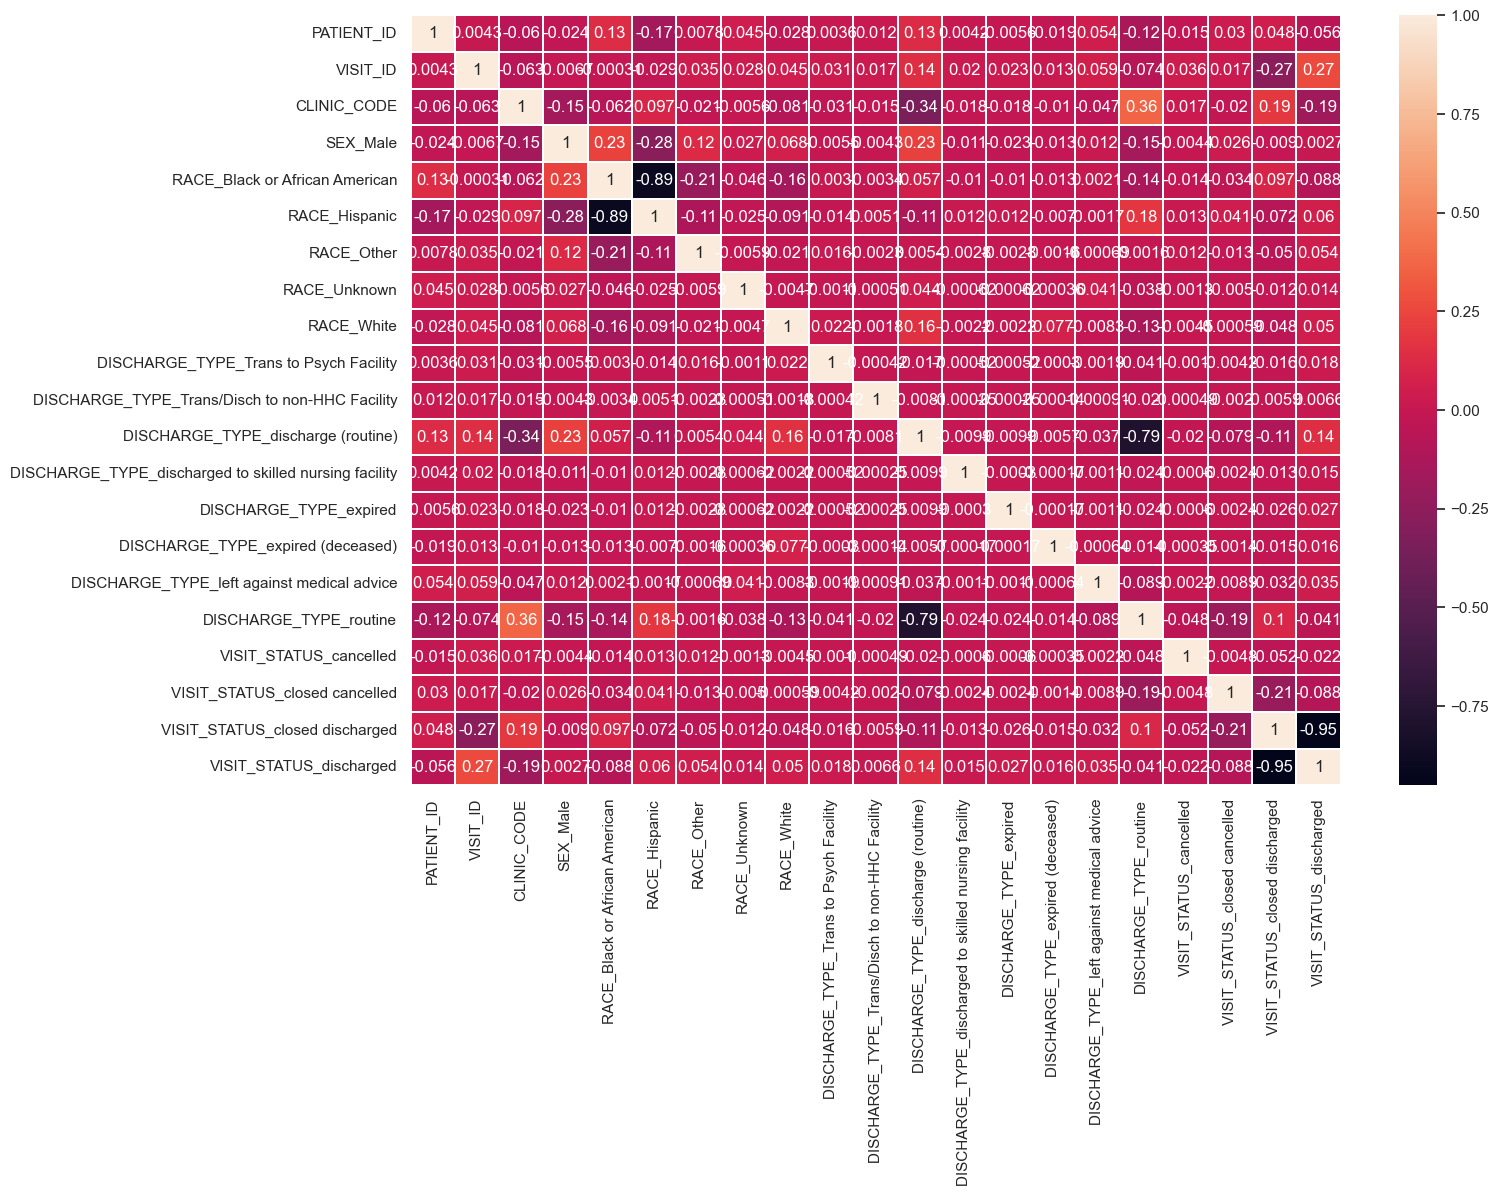

In [389]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)
plt.show() # every col have weak corr

In [416]:
## 
X=df.drop(labels=['VISIT_STATUS'], axis=1)
y=df['VISIT_STATUS']

In [417]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['VISIT_STATUS'], axis=1),
    df['VISIT_STATUS'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 21), (3000, 21))

In [423]:
# Assuming X_train, y_train, X_test, y_test are your training and test data
# Create a pipeline with imputation and logistic regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can use 'median' or 'most_frequent' too
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6883333333333334


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [426]:
# Create a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=20000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

# Define a pipeline with an imputer and a model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can use 'median' or 'most_frequent' too
    ('model', None)
])

# Iterate over models
for name, model in models.items():
    # Set the model in the pipeline
    pipeline.set_params(model=model)

    # Train the model
    pipeline.fit(X_train, y_train.values.ravel())

    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Performance metrics
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print model performance
    print(name)
    print('Model performance for Training set:')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('Model performance for Test set:')
    print("- Accuracy: {:.2f}".format(model_test_accuracy))
    print('='*30)


Logistic Regression
Model performance for Training set:
- Accuracy: 0.69
Model performance for Test set:
- Accuracy: 0.69
Decision Tree
Model performance for Training set:
- Accuracy: 1.00
Model performance for Test set:
- Accuracy: 1.00
Random Forest
Model performance for Training set:
- Accuracy: 1.00
Model performance for Test set:
- Accuracy: 1.00
Support Vector Machine
Model performance for Training set:
- Accuracy: 0.77
Model performance for Test set:
- Accuracy: 0.77
K-Nearest Neighbors
Model performance for Training set:
- Accuracy: 0.85
Model performance for Test set:
- Accuracy: 0.75


### Conclusion: From the above analysis, we can conclude that Logistic Regression and K-Nearest Neighbors machine learning algorithm are having moderate accuracy. If we aim to further enhance their performance, we can pursue hyperparameter tuning.